In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

import os
os.chdir("/content/gdrive/My Drive/latia/final/") # 切換目錄
!ls -l "/content/gdrive/My Drive/latia/final/" # 列出目錄下的檔案

Mounted at /content/gdrive/
total 20463
-rw------- 1 root root   148261 May 11 17:10 data1.csv
-rw------- 1 root root   144897 Apr 27 12:10 data2.csv
-rw------- 1 root root 20659344 May 26 13:18 TaipeiSansTCBeta-Regular.ttf


In [2]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-05-26 15:58:30--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.135.101, 74.125.135.138, 74.125.135.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.135.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-05-26 15:58:31--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.199.132, 2607:f8b0:400e:c02::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.199.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  36.5MB/s    in 0.5s    

2024-05-26 15:58:

In [3]:
import pandas as pd

csv_file1 = './data1.csv'
csv_file2 = './data2.csv'
d1 = pd.read_csv(csv_file1)
d2 = pd.read_csv(csv_file2)
df = pd.concat([d1, d2], ignore_index=True) # 讀取csv檔案
print(df.head())

#查看資料欄位資訊
print(df.info())

   gender year  academic  nonacade  nethour www email  chatroom msn  bbs  ...  \
0       1    6         2      35.0       40  35     1         0  25   25  ...   
1       2    8         4      21.0       25  14     1         0  14   23  ...   
2       2    5        30      10.0       40  35     4         0   0    1  ...   
3       1    5         2      50.0       52   2     1         0   0    2  ...   
4       1    6         6       8.0       30  10     1         0   6   12  ...   

  orient5  time1  time2 time3  time4  livqua1  livqua2  livqua3  livqua4  \
0       3      3      1     4      2        3        2        1        2   
1       3      3      2     2      3        2        2        2        3   
2       4      2      3     2      2        3        4        2        4   
3       4      1      2     2      4        1        1        1        1   
4       3      2      2     2      4        2        2        1        2   

   achieve  
0        6  
1        4  
2        6  
3   

1.學術性和非學術性和中立學生學生在學習態度的表現

           非學術        學術        中立
努力程度  3.249452  3.520833   3.23273
焦慮程度  2.963596  2.994544  2.914474
喜歡程度  2.908004   3.06002  2.939145
自信程度  2.598794  2.728671  2.658717
老師態度  3.110746  3.167659  3.006579


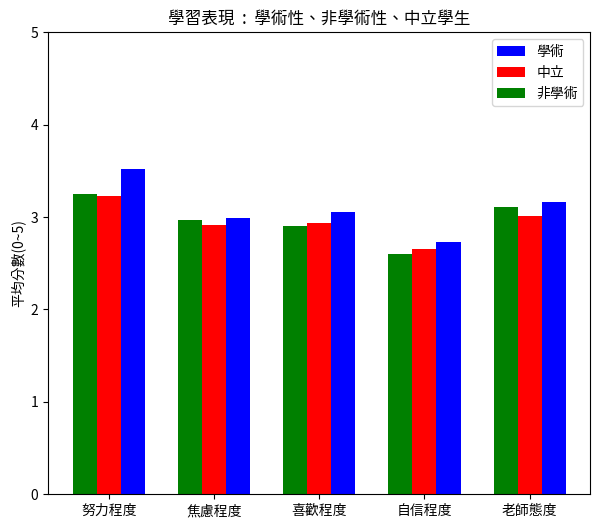

In [4]:
#先區分
df1 = df[df['academic'] < df['nonacade']]  #非學術
df2 = df[df['academic'] > df['nonacade']] #學術
df3 = df[df['academic'] == df['nonacade']]  #中立

#提取學習態度
column1 = df.columns[92:172]

df1_1 = df1[column1].replace(' ','3').astype(int)

df1_2 = df2[column1].replace(' ','3').astype(int)

df1_3 = df3[column1].replace(' ','3').astype(int)

#as
list1 = ['努力程度','焦慮程度','喜歡程度','自信程度','老師態度']
f = pd.DataFrame(columns=['非學術','學術','中立'],index=list1)
list1_1,list1_2,list1_3 = [],[],[]
prefix = 'as'
total1_1 = df1_1.filter(like=prefix).sum()
total1_2 = df1_2.filter(like=prefix).sum()
total1_3 = df1_3.filter(like=prefix).sum()
for i,j,k in zip(total1_1,total1_2,total1_3):
  list1_1.append(i)
  list1_2.append(j)
  list1_3.append(k)
f['非學術'][0] = sum(list1_1)/len(df1_1)/16
f['學術'][0] = sum(list1_2)/len(df1_2)/16
f['中立'][0] = sum(list1_3)/len(df1_3)/16

#an
list2_1,list2_2,list2_3 = [],[],[]
prefix = 'an'
total2_1 = df1_1.filter(like=prefix).sum()
total2_2 = df1_2.filter(like=prefix).sum()
total2_3 = df1_3.filter(like=prefix).sum()
for i,j,k in zip(total2_1,total2_2,total2_3):
  list2_1.append(i)
  list2_2.append(j)
  list2_3.append(k)
f['非學術'][1] = sum(list2_1)/len(df1_1)/16
f['學術'][1] = sum(list2_2)/len(df1_2)/16
f['中立'][1] = sum(list2_3)/len(df1_3)/16

#ac
list3_1,list3_2,list3_3 = [],[],[]
prefix = 'ac'
total3_1 = df1_1.filter(like=prefix).sum()
total3_2 = df1_2.filter(like=prefix).sum()
total3_3 = df1_3.filter(like=prefix).sum()
for i,j,k in zip(total3_1,total3_2,total3_3):
  list3_1.append(i)
  list3_2.append(j)
  list3_3.append(k)
f['非學術'][2] = sum(list3_1)/len(df1_1)/16
f['學術'][2] = sum(list3_2)/len(df1_2)/16
f['中立'][2] = sum(list3_3)/len(df1_3)/16

#le
list4_1,list4_2,list4_3 = [],[],[]
prefix = 'le'
total4_1 = df1_1.filter(like=prefix).sum()
total4_2 = df1_2.filter(like=prefix).sum()
total4_3 = df1_3.filter(like=prefix).sum()
for i,j,k in zip(total4_1,total4_2,total4_3):
  list4_1.append(i)
  list4_2.append(j)
  list4_3.append(k)
f['非學術'][3] = sum(list4_1)/len(df1_1)/16
f['學術'][3] = sum(list4_2)/len(df1_2)/16
f['中立'][3] = sum(list4_3)/len(df1_3)/16

#ld
list5_1,list5_2,list5_3 = [],[],[]
prefix = 'id'
total5_1 = df1_1.filter(like=prefix).sum()
total5_2 = df1_2.filter(like=prefix).sum()
total5_3 = df1_3.filter(like=prefix).sum()
for i,j,k in zip(total5_1,total5_2,total5_3):
  list5_1.append(i)
  list5_2.append(j)
  list5_3.append(k)
f['非學術'][4] = sum(list5_1)/len(df1_1)/16
f['學術'][4] = sum(list5_2)/len(df1_2)/16
f['中立'][4] = sum(list5_3)/len(df1_3)/16
print(f)
#畫圖
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 7, 5)
plt.figure(figsize=(7, 6))
plt.bar(x+0.4,f['學術'],color='b',width=0.4,label='學術')  # 改成 barh
plt.bar(x  ,f['中立'],color='r',width=0.4,label='中立')
plt.bar(x-0.4,f['非學術'],color='g',width=0.4,label='非學術')
plt.xticks(x,list1)
plt.ylim(0,5)
plt.legend()
plt.ylabel("平均分數(0~5)")
plt.title("學習表現  :  學術性、非學術性、中立學生")
plt.show()


2.生活經驗在學習平均成績的表現

[5.448275862068965, 5.2727272727272725, 5.155619596541786, 5.140909090909091, 4.6521739130434785]


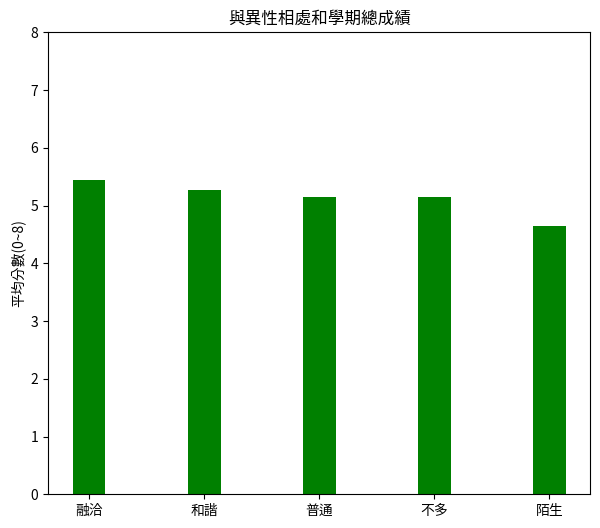

[4.583333333333333, 5.178343949044586, 5.1650717703349285, 5.203389830508475, 5.444444444444445]


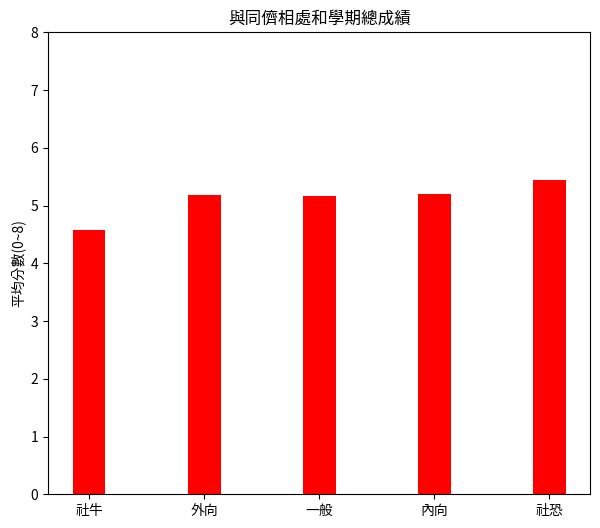

In [5]:
column2 = df.columns[55:92].append(pd.Index([df.columns[185]]))
qf = df[column2].replace(' ','3').astype(int)

opposite = qf.filter(like='opposit')
peer = qf.filter(like='peer')

#opposite
opposite1 = qf[opposite.sum(axis=1) <= 4]                   #與異性關係融洽
opposite2 = qf[(opposite.sum(axis=1) > 4) & (opposite.sum(axis=1) <= 8)]  #與異性關係和諧
opposite3 = qf[(opposite.sum(axis=1) > 8) & (opposite.sum(axis=1) <= 12)]  #與異性關係普通
opposite4 = qf[(opposite.sum(axis=1) > 12) & (opposite.sum(axis=1) <= 16)]  #與異性關係冷漠
opposite5 = qf[(opposite.sum(axis=1) > 16) & (opposite.sum(axis=1) <= 20)]  #與異性關係惡劣
avg_op1 = float(str(opposite1['achieve'].mean()).replace('nan','0'))
avg_op2 = float(str(opposite2['achieve'].mean()).replace('nan','0'))
avg_op3 = float(str(opposite3['achieve'].mean()).replace('nan','0'))
avg_op4 = float(str(opposite4['achieve'].mean()).replace('nan','0'))
avg_op5 = float(str(opposite5['achieve'].mean()).replace('nan','0'))
list_op = [avg_op1,avg_op2,avg_op3,avg_op4,avg_op5]
print(list_op)
#畫圖
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 7, 5)
plt.figure(figsize=(7, 6))  # 改成 barh
plt.bar(x  ,list_op,color='g',width=0.5)
plt.xticks(x,["融洽","和諧","普通","不多","陌生"])
plt.ylim(0,8)
plt.ylabel("平均分數(0~8)")
plt.title("與異性相處和學期總成績")
plt.show()

#peer
peer1 = qf[peer.sum(axis=1) <= 10]                  #與同儕關係融洽
peer2 = qf[(peer.sum(axis=1) > 10) & (peer.sum(axis=1) <= 20)]  #與同儕關係和諧
peer3 = qf[(peer.sum(axis=1) > 20) & (peer.sum(axis=1) <= 30)]  #與同儕關係普通
peer4 = qf[(peer.sum(axis=1) > 30) & (peer.sum(axis=1) <= 40)]  #與同儕關係冷漠
peer5 = qf[(peer.sum(axis=1) > 40) & (peer.sum(axis=1) <= 50)]  #與同儕關係惡劣
avg_pe1 = float(str(peer1['achieve'].mean()).replace('nan','0'))
avg_pe2 = float(str(peer2['achieve'].mean()).replace('nan','0'))
avg_pe3 = float(str(peer3['achieve'].mean()).replace('nan','0'))
avg_pe4 = float(str(peer4['achieve'].mean()).replace('nan','0'))
avg_pe5 = float(str(peer5['achieve'].mean()).replace('nan','0'))
list_pe = [avg_pe1,avg_pe2,avg_pe3,avg_pe4,avg_pe5]
print(list_pe)
#畫圖
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 7, 5)
plt.figure(figsize=(7, 6))  # 改成 barh
plt.bar(x  ,list_pe,color='r',width=0.5)
plt.xticks(x,["社牛","外向","一般","內向","社恐"])
plt.ylim(0,8)
plt.ylabel("平均分數(0~8)")
plt.title("與同儕相處和學期總成績")
plt.show()